# 1. Loading Modules

In [14]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import networkx as nx
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots

# 2. Model Parameters
*z - probability of being in Community 1* 

*p - same community nodes - edge probability*

*q - different community nodes -  edge probability*

In [27]:
def Planned_Partition_Model(z=0.5,p=0.6,q=0.2,N=20):
    """
    Simulating Planned Partition Graph Model
    
    Parameters
    ----------
    z: float between [0,1] 
        Probability of a Node belonging to community 1
    p: float between [0,1] 
        Probability of an Edge occuring between nodes of the same community
    q: float between [0,1] 
        Probability of an Edge occuring between nodes of the different community    
    N: int
        Number of Nodes Of Graph
    
    Returns
    -------
    G - Graph Data Structure
    """    
    ## Create Node Matrix
    nodes = np.arange(N)
    ## Defining Colour Map of Nodes
    color_map = []
    Adj = np.eye(N)
    
    ## Distributing Nodes into the two communities
    community = np.random.choice(2, size = N, p=[1 - z, z])
    
    ## Creating Colour Map
    for n in nodes:
        if community[n] == 0:
            color_map.append('blue')
        elif community[n] == 1:
            color_map.append('green') 
            
    ## Splitting into individual communities
    community = community.astype(bool)
    community0 = nodes[~community]
    community1 = nodes[community]
            
    ## Creating the Adjacency Matrix
    for i in community0:
        for j in community0:
            Adj[i,j] = np.random.choice(2,1,p=[1-p,p])
            
    for i in community1:
        for j in community1:
            Adj[i,j] = np.random.choice(2,1,p=[1-p,p])
            
    for i in community0:
        for j in community1:
            Adj[i,j] = np.random.choice(2,1,p=[1-q,q])
            Adj[j,i] = Adj[i,j]
    
    ## Construct Matrix from networkx module
    G = nx.from_numpy_matrix(Adj)
    G.add_nodes_from(np.arange(N))
    
    ## Return Graph and colour map
    return G,color_map

In [22]:
class values_input():
    def __init__(self, 
                 prob_z = "e.g. '0.5'", 
                 prob_p = "e.g. '0.2'", 
                 prob_q = "e.g. '0.32'",
                 N = "e.g. '10'"                  
                ):
        self.prob_z = widgets.Text(description = 'Prob - z',value = prob_z)
        self.prob_p = widgets.Text(description = 'Prob - p',value = prob_p)
        self.prob_q = widgets.Text(description = 'Prob - q',value = prob_q)
        self.N = widgets.Text(description = 'No: of Nodes',value = N)
        self.prob_p.on_submit(self.handle_submit)
        self.prob_p.on_submit(self.handle_submit)
        self.prob_p.on_submit(self.handle_submit)
        self.prob_p.on_submit(self.handle_submit)
        display(self.prob_z, self.prob_p, self.prob_q, self.N)

    def handle_submit(self, text):
        self.v = text.value
        return self.v
    
print("Enter the values for the variables in the following fields")
f = values_input()

Enter the values for the variables in the following fields


Text(value="e.g. '0.5'", description='Prob - z')

Text(value="e.g. '0.2'", description='Prob - p')

Text(value="e.g. '0.32'", description='Prob - q')

Text(value="e.g. '10'", description='No: of Nodes')

In [23]:
print("Values Inputed: " ,f.prob_z.value + ",", f.prob_p.value + ",", f.prob_q.value + ",", f.N.value)

Values Inputed:  0.5, 0.6, 0.2, 20


/home/akhil/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


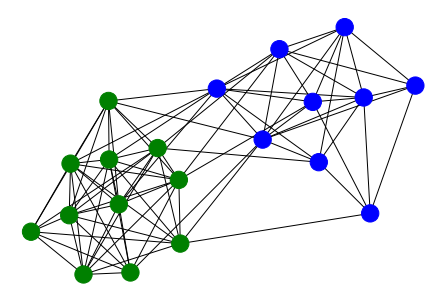

In [28]:
# Constructing Graph Network
G,colour_map = Planned_Partition_Model(float(f.prob_z.value),float(f.prob_p.value),
                                       float(f.prob_q.value),int(f.N.value))

# Drawing Graph
nx.draw(G,node_color=colour_map)
show_inline_matplotlib_plots()